In [739]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import scipy.stats as st
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
pd.options.display.max_columns=None
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import rmse
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, cross_val_score,KFold
from sklearn.preprocessing import PolynomialFeatures
import joblib

In [583]:
airfare = pd.read_excel("airfare-1.xlsx")
airfare.head()

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [584]:
airfare.shape

(9000, 11)

In [585]:
air_distance_df =pd.read_csv('air_distance.csv')
air_distance_df.head()

,Unnamed: 0,Source,Dest,Distance(Km)
0,0,BLR,DEL,1709.71
1,1,CCU,IXR,327.84
2,2,IXR,BBI,344.54
3,3,BBI,BLR,1166.17
4,4,DEL,LKO,423.41


In [586]:
air_distance_df.drop('Unnamed: 0',axis=1)

,Source,Dest,Distance(Km)
0,BLR,DEL,1709.71
1,CCU,IXR,327.84
2,IXR,BBI,344.54
3,BBI,BLR,1166.17
4,DEL,LKO,423.41
...,...,...,...
121,VTZ,HYD,511.31
122,BLR,STV,1026.37
123,STV,DEL,936.58
124,IXB,DEL,1126.20


In [587]:
air_distance_df_copy = air_distance_df.copy()
air_distance_df_copy

,Unnamed: 0,Source,Dest,Distance(Km)
0,0,BLR,DEL,1709.71
1,1,CCU,IXR,327.84
2,2,IXR,BBI,344.54
3,3,BBI,BLR,1166.17
4,4,DEL,LKO,423.41
...,...,...,...,...
121,121,VTZ,HYD,511.31
122,122,BLR,STV,1026.37
123,123,STV,DEL,936.58
124,124,IXB,DEL,1126.20


In [588]:
air_distance_df_copy.rename(columns = {'Source':'SourceOld', 'Dest':'DestOld'}, inplace = True)
air_distance_df_copy.rename(columns = {'SourceOld':'Dest', 'DestOld':'Source'}, inplace = True)
air_distance_df_copy

,Unnamed: 0,Dest,Source,Distance(Km)
0,0,BLR,DEL,1709.71
1,1,CCU,IXR,327.84
2,2,IXR,BBI,344.54
3,3,BBI,BLR,1166.17
4,4,DEL,LKO,423.41
...,...,...,...,...
121,121,VTZ,HYD,511.31
122,122,BLR,STV,1026.37
123,123,STV,DEL,936.58
124,124,IXB,DEL,1126.20


In [589]:
air_distance_df_copy.drop('Unnamed: 0',axis=1)

,Dest,Source,Distance(Km)
0,BLR,DEL,1709.71
1,CCU,IXR,327.84
2,IXR,BBI,344.54
3,BBI,BLR,1166.17
4,DEL,LKO,423.41
...,...,...,...
121,VTZ,HYD,511.31
122,BLR,STV,1026.37
123,STV,DEL,936.58
124,IXB,DEL,1126.20


In [590]:
result_airdist = pd.concat([air_distance_df,air_distance_df_copy])
result_airdist

,Unnamed: 0,Source,Dest,Distance(Km)
0,0,BLR,DEL,1709.71
1,1,CCU,IXR,327.84
2,2,IXR,BBI,344.54
3,3,BBI,BLR,1166.17
4,4,DEL,LKO,423.41
...,...,...,...,...
121,121,HYD,VTZ,511.31
122,122,STV,BLR,1026.37
123,123,DEL,STV,936.58
124,124,DEL,IXB,1126.20


In [591]:
airfare['Source'] = airfare['Route Map'].str[:3]
airfare

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price,Source
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,BLR
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,CCU
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,DEL
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,CCU
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,BLR
...,...,...,...,...,...,...,...,...,...,...,...,...
8995,IndiGo,27/03/2019,Delhi,Cochin,DEL → BLR → COK,05:05,10:05,5h,1 stop,No info,6827,DEL
8996,Air India,12/05/2019,Mumbai,Hyderabad,BOM → HYD,06:20,07:40,1h 20m,non-stop,No info,3100,BOM
8997,Jet Airways,15/03/2019,Mumbai,Hyderabad,BOM → HYD,19:35,21:05,1h 30m,non-stop,In-flight meal not included,2759,BOM
8998,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753,DEL


In [592]:
airfare['Dest'] = airfare['Route Map'].str[-3:]
airfare

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price,Source,Dest
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,BLR,DEL
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,CCU,BLR
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,DEL,COK
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,CCU,BLR
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,BLR,DEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,IndiGo,27/03/2019,Delhi,Cochin,DEL → BLR → COK,05:05,10:05,5h,1 stop,No info,6827,DEL,COK
8996,Air India,12/05/2019,Mumbai,Hyderabad,BOM → HYD,06:20,07:40,1h 20m,non-stop,No info,3100,BOM,HYD
8997,Jet Airways,15/03/2019,Mumbai,Hyderabad,BOM → HYD,19:35,21:05,1h 30m,non-stop,In-flight meal not included,2759,BOM,HYD
8998,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753,DEL,COK


In [593]:
airline_train_df = pd.merge(airfare, result_airdist, on=['Source','Dest'], how="left")
airline_train_df

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price,Source,Dest,Unnamed: 0,Distance(Km)
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,BLR,DEL,0,1709.71
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,CCU,BLR,10,1547.27
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,DEL,COK,21,2048.60
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,CCU,BLR,10,1547.27
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,BLR,DEL,0,1709.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,IndiGo,27/03/2019,Delhi,Cochin,DEL → BLR → COK,05:05,10:05,5h,1 stop,No info,6827,DEL,COK,21,2048.60
8996,Air India,12/05/2019,Mumbai,Hyderabad,BOM → HYD,06:20,07:40,1h 20m,non-stop,No info,3100,BOM,HYD,35,623.54
8997,Jet Airways,15/03/2019,Mumbai,Hyderabad,BOM → HYD,19:35,21:05,1h 30m,non-stop,In-flight meal not included,2759,BOM,HYD,35,623.54
8998,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753,DEL,COK,21,2048.60


In [594]:
airline_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000 entries, 0 to 8999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            9000 non-null   object 
 1   Date               9000 non-null   object 
 2   Departure Station  9000 non-null   object 
 3   Arrival Station    9000 non-null   object 
 4   Route Map          9000 non-null   object 
 5   Departure Time     9000 non-null   object 
 6   Arrival Time       9000 non-null   object 
 7   Journey Time       9000 non-null   object 
 8   Stops              9000 non-null   object 
 9   Extra Info         9000 non-null   object 
 10  Price              9000 non-null   int64  
 11  Source             9000 non-null   object 
 12  Dest               9000 non-null   object 
 13  Unnamed: 0         9000 non-null   int64  
 14  Distance(Km)       9000 non-null   float64
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+ MB


In [595]:
airline_train_df.isnull().sum()

Airline              0
Date                 0
Departure Station    0
Arrival Station      0
Route Map            0
Departure Time       0
Arrival Time         0
Journey Time         0
Stops                0
Extra Info           0
Price                0
Source               0
Dest                 0
Unnamed: 0           0
Distance(Km)         0
dtype: int64

There is no Missing value after merging 2 datasets

In [596]:
airline_train_df.describe()

,Price,Unnamed: 0,Distance(Km)
count,9000.000000,9000.000000,9000.000000
mean,9087.764333,14.385778,1728.709882
std,4605.498942,9.687451,368.268813
min,1759.000000,0.000000,623.540000
25%,5228.000000,10.000000,1547.270000
50%,8369.000000,14.000000,1709.710000
75%,12373.000000,21.000000,2048.600000
max,79512.000000,35.000000,2048.600000


In [597]:
airline_train_df.columns

Index(['Airline', 'Date', 'Departure Station', 'Arrival Station', 'Route Map',
       'Departure Time', 'Arrival Time', 'Journey Time', 'Stops', 'Extra Info',
       'Price', 'Source', 'Dest', 'Unnamed: 0', 'Distance(Km)'],
      dtype='object')

In [598]:
airline_train_df.dtypes

Airline               object
Date                  object
Departure Station     object
Arrival Station       object
Route Map             object
Departure Time        object
Arrival Time          object
Journey Time          object
Stops                 object
Extra Info            object
Price                  int64
Source                object
Dest                  object
Unnamed: 0             int64
Distance(Km)         float64
dtype: object

In [599]:
cat_cols = airline_train_df.select_dtypes(include = 'object')
num_cols = airline_train_df.select_dtypes(include = np.number)
print('Numerical variables are : ',num_cols.columns)
print('Categorical Columns are : ',cat_cols.columns)

Numerical variables are :  Index(['Price', 'Unnamed: 0', 'Distance(Km)'], dtype='object')
Categorical Columns are :  Index(['Airline', 'Date', 'Departure Station', 'Arrival Station', 'Route Map',
       'Departure Time', 'Arrival Time', 'Journey Time', 'Stops', 'Extra Info',
       'Source', 'Dest'],
      dtype='object')


In [600]:
print('% Values in each categorical columns')
for i in cat_cols.columns:
    print('\n% Values in column ',i)
    print((airline_train_df[i].value_counts()))
    print('----------------------------------------------')

% Values in each categorical columns

% Values in column  Airline
Jet Airways                          3227
IndiGo                               1757
Air India                            1471
Multiple carriers                    1014
SpiceJet                              697
Vistara                               399
Air Asia                              256
GoAir                                 160
Multiple carriers Premium economy      11
Jet Airways Business                    4
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
----------------------------------------------

% Values in column  Date
18/05/2019    429
6/06/2019     429
21/05/2019    423
9/06/2019     420
12/06/2019    401
9/05/2019     394
21/03/2019    367
15/05/2019    341
27/05/2019    317
24/06/2019    304
1/06/2019     297
27/06/2019    286
3/06/2019     272
6/03/2019     272
15/06/2019    271
24/03/2019    267
27/03/2019    255
6/05/2019     245
24/05

Hence found Delhi and New Delhi are seperate entry in Arrival Station feature, so will make both in single column named "Delhi".

In [601]:
def Newdelhi(x):
    if x=='New Delhi':
        return 'Delhi'
    else:
        return x
    
airline_train_df['Arrival Station']=airline_train_df['Arrival Station'].apply(Newdelhi)

In [602]:
airline_train_df['Arrival Station'].value_counts()

Cochin       3832
Banglore     2415
Delhi        1851
Hyderabad     582
Kolkata       320
Name: Arrival Station, dtype: int64

In [603]:
airline_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000 entries, 0 to 8999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            9000 non-null   object 
 1   Date               9000 non-null   object 
 2   Departure Station  9000 non-null   object 
 3   Arrival Station    9000 non-null   object 
 4   Route Map          9000 non-null   object 
 5   Departure Time     9000 non-null   object 
 6   Arrival Time       9000 non-null   object 
 7   Journey Time       9000 non-null   object 
 8   Stops              9000 non-null   object 
 9   Extra Info         9000 non-null   object 
 10  Price              9000 non-null   int64  
 11  Source             9000 non-null   object 
 12  Dest               9000 non-null   object 
 13  Unnamed: 0         9000 non-null   int64  
 14  Distance(Km)       9000 non-null   float64
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+ MB


# Changing some columns to Datetime Dtype

In [604]:
def change_into_datetime(col):
    airline_train_df[col]=pd.to_datetime(airline_train_df[col])
    
for i in ['Date','Departure Time','Arrival Time']:
    change_into_datetime(i)

In [605]:
airline_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000 entries, 0 to 8999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Airline            9000 non-null   object        
 1   Date               9000 non-null   datetime64[ns]
 2   Departure Station  9000 non-null   object        
 3   Arrival Station    9000 non-null   object        
 4   Route Map          9000 non-null   object        
 5   Departure Time     9000 non-null   datetime64[ns]
 6   Arrival Time       9000 non-null   datetime64[ns]
 7   Journey Time       9000 non-null   object        
 8   Stops              9000 non-null   object        
 9   Extra Info         9000 non-null   object        
 10  Price              9000 non-null   int64         
 11  Source             9000 non-null   object        
 12  Dest               9000 non-null   object        
 13  Unnamed: 0         9000 non-null   int64         
 14  Distance

In [606]:
airline_train_df['day_of_journey']=airline_train_df['Date'].dt.day
airline_train_df['month_of_journey']=airline_train_df['Date'].dt.month #seperate column named day and month from Date column
airline_train_df.drop('Date',axis=1,inplace=True)                      #Removed column Date

In [607]:
airline_train_df.head()

,Airline,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price,Source,Dest,Unnamed: 0,Distance(Km),day_of_journey,month_of_journey
0,IndiGo,Banglore,Delhi,BLR → DEL,2022-07-12 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,BLR,DEL,0,1709.71,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-07-12 05:50:00,2022-07-12 13:15:00,7h 25m,2 stops,No info,7662,CCU,BLR,10,1547.27,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-07-12 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,DEL,COK,21,2048.60,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-07-12 18:05:00,2022-07-12 23:30:00,5h 25m,1 stop,No info,6218,CCU,BLR,10,1547.27,5,12
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,2022-07-12 16:50:00,2022-07-12 21:35:00,4h 45m,1 stop,No info,13302,BLR,DEL,0,1709.71,3,1


In [608]:
airline_train_df['Departure_hour']=pd.to_datetime(airline_train_df['Departure Time']).dt.hour
airline_train_df['Departure_minute']=pd.to_datetime(airline_train_df['Departure Time']).dt.minute #similar to Date extracted hour and minute from Departure Time
airline_train_df.drop('Departure Time',axis=1,inplace=True)                                       #Removed column Departure Time

In [609]:
airline_train_df.head()

,Airline,Departure Station,Arrival Station,Route Map,Arrival Time,Journey Time,Stops,Extra Info,Price,Source,Dest,Unnamed: 0,Distance(Km),day_of_journey,month_of_journey,Departure_hour,Departure_minute
0,IndiGo,Banglore,Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,BLR,DEL,0,1709.71,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-07-12 13:15:00,7h 25m,2 stops,No info,7662,CCU,BLR,10,1547.27,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-06-10 04:25:00,19h,2 stops,No info,13882,DEL,COK,21,2048.60,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-07-12 23:30:00,5h 25m,1 stop,No info,6218,CCU,BLR,10,1547.27,5,12,18,5
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,2022-07-12 21:35:00,4h 45m,1 stop,No info,13302,BLR,DEL,0,1709.71,3,1,16,50


In [610]:
airline_train_df['Arrival_hour']=pd.to_datetime(airline_train_df['Arrival Time']).dt.hour
airline_train_df['Arrival_minute']=pd.to_datetime(airline_train_df['Arrival Time']).dt.minute #similar to Date extracted hour and minute from Arrival Time
airline_train_df.drop('Arrival Time',axis=1,inplace=True)                                     #Removed column Arrival Time

In [611]:
airline_train_df.head()

,Airline,Departure Station,Arrival Station,Route Map,Journey Time,Stops,Extra Info,Price,Source,Dest,Unnamed: 0,Distance(Km),day_of_journey,month_of_journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,BLR,DEL,0,1709.71,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,CCU,BLR,10,1547.27,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,DEL,COK,21,2048.60,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,CCU,BLR,10,1547.27,5,12,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,BLR,DEL,0,1709.71,3,1,16,50,21,35


In [612]:
Journey_Time=list(airline_train_df['Journey Time'])
for i in range(len(Journey_Time)):
    if len(Journey_Time[i].split(' '))==2:
        pass
    else:
        if 'h' in Journey_Time[i]:
            Journey_Time[i]=Journey_Time[i] + ' '+ '0m'
        else:
             Journey_Time[i]='0h'+' ' + Journey_Time[i]

In [613]:
airline_train_df['Journey Time']=Journey_Time

In [614]:
airline_train_df.head() 

,Airline,Departure Station,Arrival Station,Route Map,Journey Time,Stops,Extra Info,Price,Source,Dest,Unnamed: 0,Distance(Km),day_of_journey,month_of_journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,BLR,DEL,0,1709.71,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,CCU,BLR,10,1547.27,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,DEL,COK,21,2048.60,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,CCU,BLR,10,1547.27,5,12,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,BLR,DEL,0,1709.71,3,1,16,50,21,35


In [615]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minute(x):
    return x.split(' ')[1][0:-1]

In [616]:
airline_train_df['Journey_hours']=airline_train_df['Journey Time'].apply(hour)
airline_train_df['Journey_mins']=airline_train_df['Journey Time'].apply(minute)
airline_train_df.drop('Journey Time',axis=1,inplace=True)  

In [617]:
airline_train_df.head()

,Airline,Departure Station,Arrival Station,Route Map,Stops,Extra Info,Price,Source,Dest,Unnamed: 0,Distance(Km),day_of_journey,month_of_journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Journey_hours,Journey_mins
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,BLR,DEL,0,1709.71,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,CCU,BLR,10,1547.27,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,DEL,COK,21,2048.60,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,CCU,BLR,10,1547.27,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,BLR,DEL,0,1709.71,3,1,16,50,21,35,4,45


In [618]:
airline_train_df.dtypes

Airline               object
Departure Station     object
Arrival Station       object
Route Map             object
Stops                 object
Extra Info            object
Price                  int64
Source                object
Dest                  object
Unnamed: 0             int64
Distance(Km)         float64
day_of_journey         int64
month_of_journey       int64
Departure_hour         int64
Departure_minute       int64
Arrival_hour           int64
Arrival_minute         int64
Journey_hours         object
Journey_mins          object
dtype: object

We found Journey_hours and Journey_mins dtype as object we need to make it as int.

In [619]:
airline_train_df['Journey_hours']=airline_train_df['Journey_hours'].astype(int)
airline_train_df['Journey_mins']=airline_train_df['Journey_mins'].astype(int)

In [620]:
airline_train_df.dtypes

Airline               object
Departure Station     object
Arrival Station       object
Route Map             object
Stops                 object
Extra Info            object
Price                  int64
Source                object
Dest                  object
Unnamed: 0             int64
Distance(Km)         float64
day_of_journey         int64
month_of_journey       int64
Departure_hour         int64
Departure_minute       int64
Arrival_hour           int64
Arrival_minute         int64
Journey_hours          int32
Journey_mins           int32
dtype: object

In [621]:
cat_cols1 = airline_train_df.select_dtypes(include = 'object')
num_cols1 = airline_train_df.select_dtypes(include = np.number)
print('Numerical variables are : ',num_cols1.columns)
print('Categorical Columns are : ',cat_cols1.columns)

Numerical variables are :  Index(['Price', 'Unnamed: 0', 'Distance(Km)', 'day_of_journey',
       'month_of_journey', 'Departure_hour', 'Departure_minute',
       'Arrival_hour', 'Arrival_minute', 'Journey_hours', 'Journey_mins'],
      dtype='object')
Categorical Columns are :  Index(['Airline', 'Departure Station', 'Arrival Station', 'Route Map', 'Stops',
       'Extra Info', 'Source', 'Dest'],
      dtype='object')


In [622]:
cat_cols1.head()

,Airline,Departure Station,Arrival Station,Route Map,Stops,Extra Info,Source,Dest
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,BLR,DEL
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,BLR
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,COK
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,BLR
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,BLR,DEL


In [623]:
num_cols1.head()

,Price,Unnamed: 0,Distance(Km),day_of_journey,month_of_journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Journey_hours,Journey_mins
0,3897,0,1709.71,24,3,22,20,1,10,2,50
1,7662,10,1547.27,5,1,5,50,13,15,7,25
2,13882,21,2048.60,6,9,9,25,4,25,19,0
3,6218,10,1547.27,5,12,18,5,23,30,5,25
4,13302,0,1709.71,3,1,16,50,21,35,4,45


In [624]:
cat_cols1['Airline'].value_counts()

Jet Airways                          3227
IndiGo                               1757
Air India                            1471
Multiple carriers                    1014
SpiceJet                              697
Vistara                               399
Air Asia                              256
GoAir                                 160
Multiple carriers Premium economy      11
Jet Airways Business                    4
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

# Data Visualization (1)- Plotting Airline vs Price

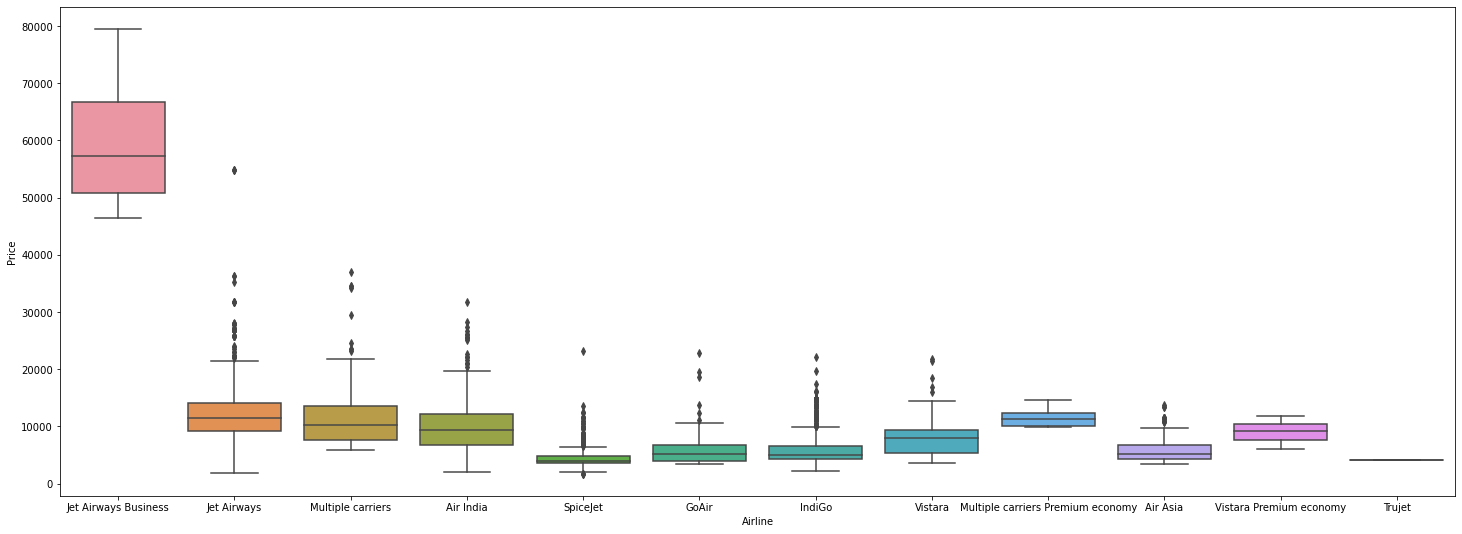

In [625]:
plt.figure(figsize=(25,9))
sns.boxplot(x = "Airline", y = "Price", data = airline_train_df.sort_values("Price", ascending = False))
plt.show()

From graph we can see that 'Jet Airways Business' have the highest Price and it is a costiest airways. Apart from the first Airline almost all are having similar median.

In [626]:
Airline=pd.get_dummies(cat_cols1['Airline'],drop_first=True)  #one hot encoding of Airline columns
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


# Data Visualization (2)- Plotting Stops vs Price

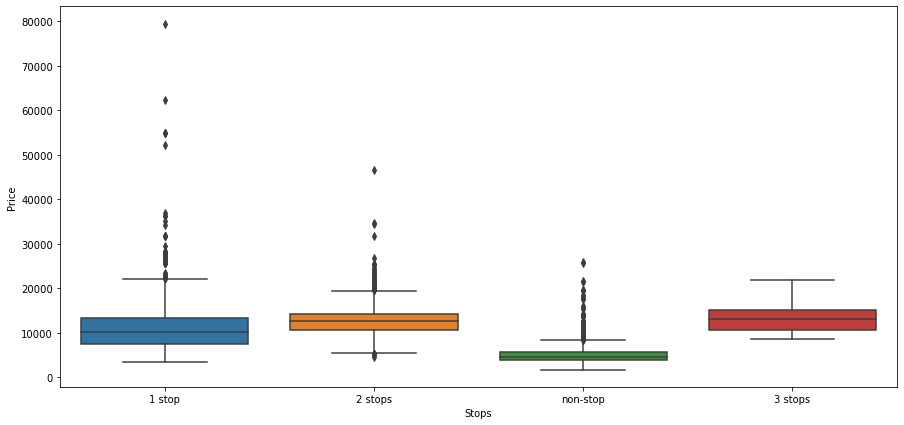

In [627]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "Stops", y = "Price", data = airline_train_df.sort_values("Price", ascending = False))
plt.show()

In [628]:
airline_train_df['Stops'].value_counts()

1 stop      4753
non-stop    2947
2 stops     1260
3 stops       40
Name: Stops, dtype: int64

In [629]:
airline_train_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3}, inplace = True)  #Label encoded Stop column

In [630]:
airline_train_df.head()

,Airline,Departure Station,Arrival Station,Route Map,Stops,Extra Info,Price,Source,Dest,Unnamed: 0,Distance(Km),day_of_journey,month_of_journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Journey_hours,Journey_mins
0,IndiGo,Banglore,Delhi,BLR → DEL,0,No info,3897,BLR,DEL,0,1709.71,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,CCU,BLR,10,1547.27,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,DEL,COK,21,2048.60,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,CCU,BLR,10,1547.27,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1,No info,13302,BLR,DEL,0,1709.71,3,1,16,50,21,35,4,45


# Data Visualization (3)- Plotting Departure Station vs Price

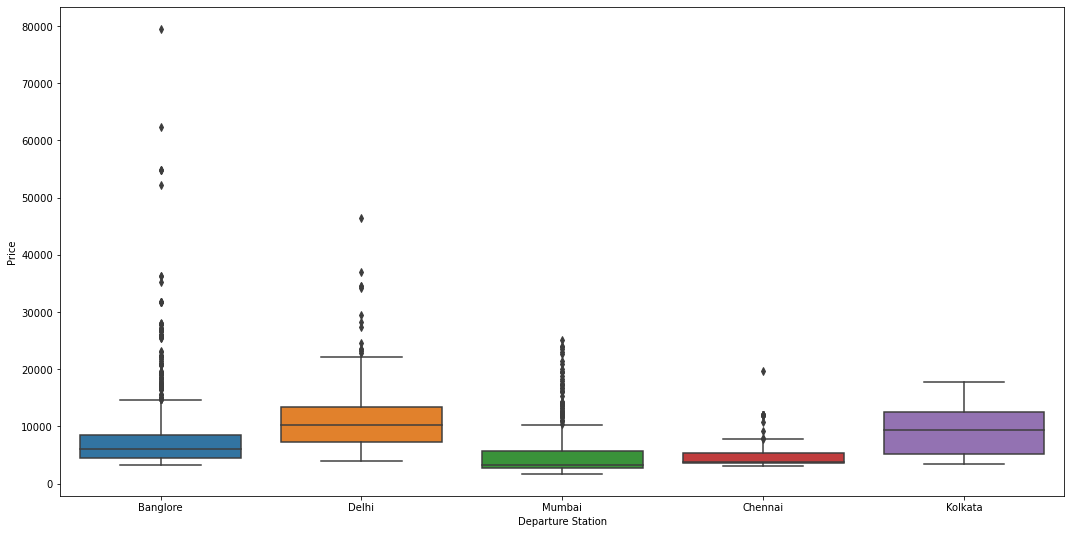

In [631]:
plt.figure(figsize=(18,9))
sns.boxplot(x='Departure Station',y='Price',data=airline_train_df.sort_values('Price',ascending=False))
plt.show()

In [632]:
airline_train_df['Departure Station'].value_counts()

Delhi       3832
Kolkata     2415
Banglore    1851
Mumbai       582
Chennai      320
Name: Departure Station, dtype: int64

In [633]:
Dept_Station=pd.get_dummies(cat_cols1['Departure Station'])  #one hot encoding of Departure Station columns
Dept_Station.head()

,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


# Data Visualization (4)- Plotting Arrival Station vs Price

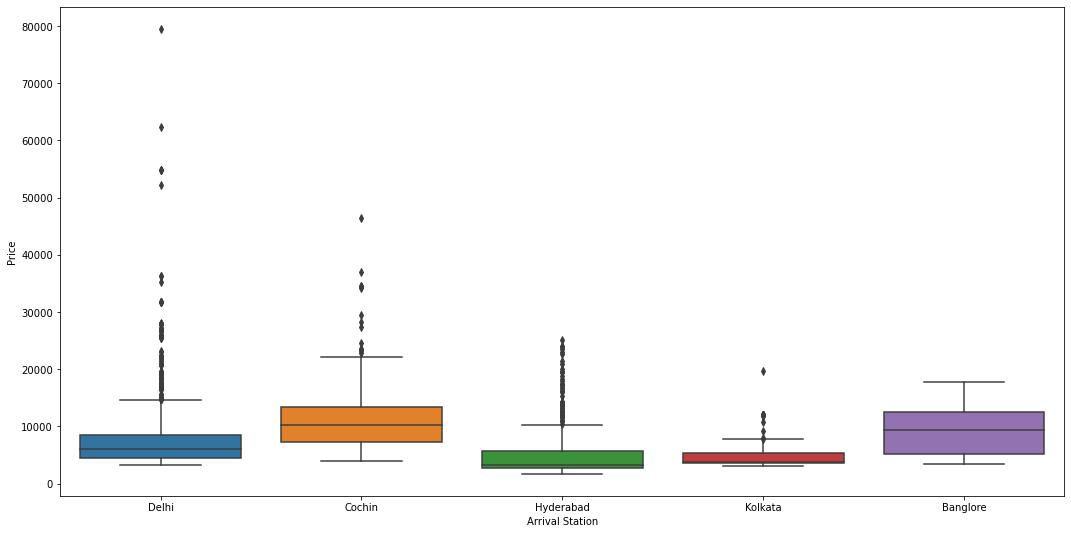

In [634]:
plt.figure(figsize=(18,9))
sns.boxplot(x='Arrival Station',y='Price',data=airline_train_df.sort_values('Price',ascending=False))
plt.show()

In [635]:
airline_train_df['Arrival Station'].value_counts()

Cochin       3832
Banglore     2415
Delhi        1851
Hyderabad     582
Kolkata       320
Name: Arrival Station, dtype: int64

In [636]:
Arrival_Station=pd.get_dummies(cat_cols1['Arrival Station'])  #one hot encoding of Arrival Station columns
Arrival_Station.head()

,Banglore,Cochin,Delhi,Hyderabad,Kolkata
0,0,0,1,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0


# Data Visualization (5)- Plotting Count of flights month wise

Text(0, 0.5, 'Count of flights------>')

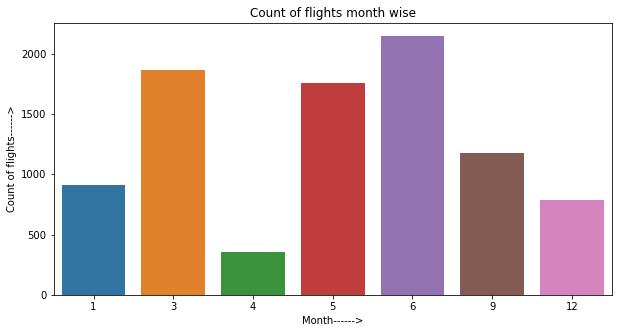

In [637]:
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'month_of_journey', data = airline_train_df)
plt.xlabel('Month------>')
plt.ylabel('Count of flights------>')

# Data Visualization (7)- Plotting Count of flights with different Airlines

Text(0, 0.5, 'Number of flights----->')

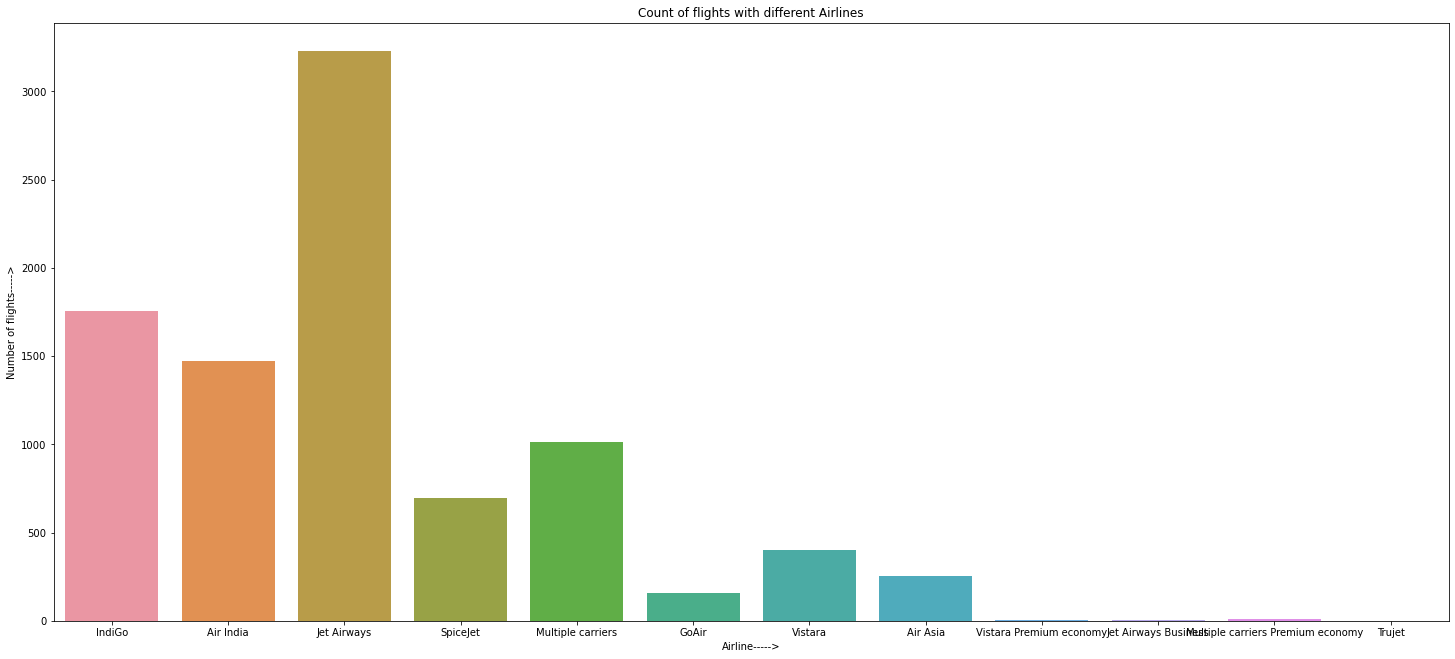

In [638]:
plt.figure(figsize = (25, 11))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data = airline_train_df)
plt.xlabel('Airline----->')
plt.ylabel('Number of flights----->')

# Data Visualization (8)- Correlation between all features using heatmap

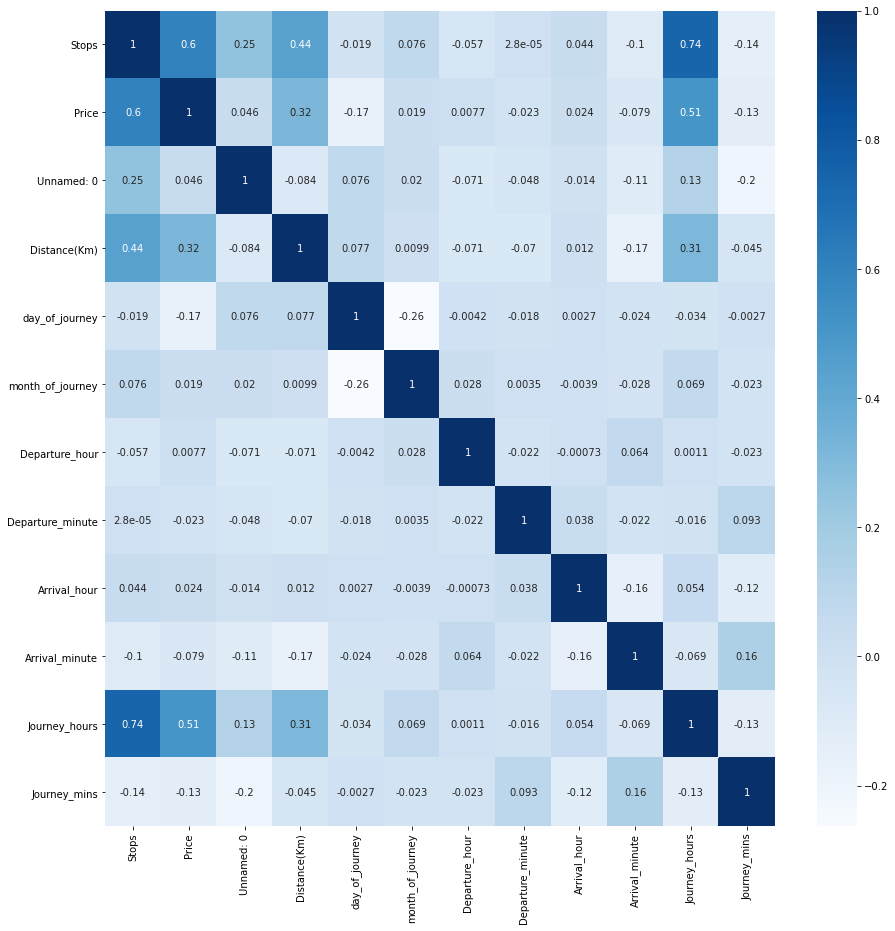

In [639]:
plt.figure(figsize = (15,15))
sns.heatmap(airline_train_df.corr(), annot = True,cmap="Blues")
plt.show()

We can see that Stops is highly correlated with Journey_hours which is very obvious. If the number of stops would increase, the Journey hours of the flight will also increase.

price is highly correlated with Stops because if stops would increase that would also require a high quantity of fuel, and that would increase the Price.

In [640]:
cat_cols1['Route Map'].value_counts()

DEL → BOM → COK                2024
BLR → DEL                      1314
CCU → BOM → BLR                 825
CCU → BLR                       615
BOM → HYD                       515
                               ... 
BOM → JLR → HYD                   1
CCU → IXA → BLR                   1
BOM → VNS → DEL → HYD             1
BOM → JDH → JAI → DEL → HYD       1
BLR → HBX → BOM → AMD → DEL       1
Name: Route Map, Length: 124, dtype: int64

In [641]:
airline_train_df.head()

,Airline,Departure Station,Arrival Station,Route Map,Stops,Extra Info,Price,Source,Dest,Unnamed: 0,Distance(Km),day_of_journey,month_of_journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Journey_hours,Journey_mins
0,IndiGo,Banglore,Delhi,BLR → DEL,0,No info,3897,BLR,DEL,0,1709.71,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,CCU,BLR,10,1547.27,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,DEL,COK,21,2048.60,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,CCU,BLR,10,1547.27,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1,No info,13302,BLR,DEL,0,1709.71,3,1,16,50,21,35,4,45


In [642]:
airline_train_df['Extra Info'].value_counts()

No info                         7053
In-flight meal not included     1649
No check-in baggage included     270
1 Long layover                    17
Change airports                    4
Business class                     3
No Info                            2
Red-eye flight                     1
1 Short layover                    1
Name: Extra Info, dtype: int64

In [643]:
cat_cols1['Route_1']=cat_cols1['Route Map'].str.split('→').str[0]
cat_cols1['Route_2']=cat_cols1['Route Map'].str.split('→').str[1]
cat_cols1['Route_3']=cat_cols1['Route Map'].str.split('→').str[2]
cat_cols1['Route_4']=cat_cols1['Route Map'].str.split('→').str[3]
cat_cols1['Route_5']=cat_cols1['Route Map'].str.split('→').str[4]    #Seperate features for all Routes from Route Map column

<ipython-input-643-533428ecdbbb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_cols1['Route_1']=cat_cols1['Route Map'].str.split('→').str[0]
<ipython-input-643-533428ecdbbb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_cols1['Route_2']=cat_cols1['Route Map'].str.split('→').str[1]
<ipython-input-643-533428ecdbbb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [644]:
cat_cols1.head()

,Airline,Departure Station,Arrival Station,Route Map,Stops,Extra Info,Source,Dest,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,BLR,DEL,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,BLR,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,COK,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,BLR,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,BLR,DEL,BLR,NAG,DEL,NaN,NaN


In [645]:
cat_cols1.drop('Route Map',axis=1,inplace=True)  #Removed column Route map

C:\Users\kumar\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [646]:
cat_cols1.head()

,Airline,Departure Station,Arrival Station,Stops,Extra Info,Source,Dest,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,Delhi,non-stop,No info,BLR,DEL,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,BLR,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,COK,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,BLR,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,Delhi,1 stop,No info,BLR,DEL,BLR,NAG,DEL,NaN,NaN


In [647]:
cat_cols1.isnull().sum()

Airline                 0
Departure Station       0
Arrival Station         0
Stops                   0
Extra Info              0
Source                  0
Dest                    0
Route_1                 0
Route_2                 0
Route_3              2947
Route_4              7700
Route_5              8960
dtype: int64

 We Found missing values in Route_3, 4 and 5.

In [648]:
for i in ['Route_3','Route_4','Route_5']:
    cat_cols1[i].fillna('None',inplace=True)

C:\Users\kumar\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [649]:
cat_cols1.isnull().sum()   #Removed the missing values in Route_3, 4 and 5.

Airline              0
Departure Station    0
Arrival Station      0
Stops                0
Extra Info           0
Source               0
Dest                 0
Route_1              0
Route_2              0
Route_3              0
Route_4              0
Route_5              0
dtype: int64

In [650]:
cat_cols1.columns

Index(['Airline', 'Departure Station', 'Arrival Station', 'Stops',
       'Extra Info', 'Source', 'Dest', 'Route_1', 'Route_2', 'Route_3',
       'Route_4', 'Route_5'],
      dtype='object')

In [651]:
cat_cols1['Route_3'].value_counts()

None     2947
 COK     2702
 BLR     1541
 BOM      901
 DEL      473
 DEL       98
 MAA       73
 COK       60
 HYD       37
 AMD       28
 NAG       23
 IDR       15
 GOI       12
 VGA       11
 BBI       11
 HYD       11
 GAU       10
 PNQ       10
 BHO        8
 JDH        6
 IMF        5
 HBX        5
 ISK        3
 TRV        2
 VTZ        2
 IXR        2
 UDR        2
 JAI        1
 CCU        1
Name: Route_3, dtype: int64

In [652]:
for i in cat_cols1.columns:
    print('{} has Total {} Categories'.format(i,len(cat_cols1[i].value_counts())))

Airline has Total 12 Categories
Departure Station has Total 5 Categories
Arrival Station has Total 5 Categories
Stops has Total 4 Categories
Extra Info has Total 9 Categories
Source has Total 5 Categories
Dest has Total 5 Categories
Route_1 has Total 5 Categories
Route_2 has Total 45 Categories
Route_3 has Total 29 Categories
Route_4 has Total 13 Categories
Route_5 has Total 5 Categories


# Converting Route feature into numerical format using Label Encoding Technique

In [653]:
encoder = LabelEncoder()

In [654]:
for i in [ 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    cat_cols1[i]=encoder.fit_transform(cat_cols1[i])

<ipython-input-654-6c316fa3d0f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_cols1[i]=encoder.fit_transform(cat_cols1[i])


In [655]:
cat_cols1.head()

,Airline,Departure Station,Arrival Station,Stops,Extra Info,Source,Dest,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,Delhi,non-stop,No info,BLR,DEL,0,13,28,12,4
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,BLR,2,25,1,3,4
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,COK,3,32,4,5,4
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,BLR,2,34,3,12,4
4,IndiGo,Banglore,Delhi,1 stop,No info,BLR,DEL,0,34,8,12,4


In [656]:
cat_cols1['Route_5'].value_counts()

4    8960
1      23
0      10
2       5
3       2
Name: Route_5, dtype: int64

In [657]:
cat_cols1.drop('Extra Info',axis=1,inplace=True)  #Removed column Extra Info, Source and Dest
cat_cols1.drop('Source',axis=1,inplace=True)
cat_cols1.drop('Dest',axis=1,inplace=True)

C:\Users\kumar\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [658]:
cat_cols1['Stops'] = cat_cols1['Stops'].map({'non-stop': 0, '2 stops': 2,'1 stop': 1, '3 stops': 3})

<ipython-input-658-a29ab4af5ca7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_cols1['Stops'] = cat_cols1['Stops'].map({'non-stop': 0, '2 stops': 2,'1 stop': 1, '3 stops': 3})


In [659]:
cat_cols1.head()

,Airline,Departure Station,Arrival Station,Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,Delhi,0,0,13,28,12,4
1,Air India,Kolkata,Banglore,2,2,25,1,3,4
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,4
3,IndiGo,Kolkata,Banglore,1,2,34,3,12,4
4,IndiGo,Banglore,Delhi,1,0,34,8,12,4


# Combining all Segregated columns to a Final Dataframe named as airline_train_final

In [660]:
Final_airline_train=pd.concat([cat_cols1,Airline,Arrival_Station,Dept_Station,num_cols1],axis=1)

In [661]:
Final_airline_train.head()

,Airline,Departure Station,Arrival Station,Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Cochin,Delhi,Hyderabad,Kolkata,Banglore,Chennai,Delhi,Kolkata,Mumbai,Price,Unnamed: 0,Distance(Km),day_of_journey,month_of_journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Journey_hours,Journey_mins
0,IndiGo,Banglore,Delhi,0,0,13,28,12,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,3897,0,1709.71,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,7662,10,1547.27,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,13882,21,2048.60,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,12,4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,6218,10,1547.27,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1,0,34,8,12,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13302,0,1709.71,3,1,16,50,21,35,4,45


In [662]:
Final_airline_train.shape

(9000, 41)

In [663]:
print(Airline.shape)
print(Dept_Station.shape)
print(Arrival_Station.shape)

(9000, 11)
(9000, 5)
(9000, 5)


In [664]:
Final_airline_train.drop('Airline',axis=1,inplace=True)       #Removed column Airline, Departure Station and Arrival Station and Unnamed: 0
Final_airline_train.drop('Departure Station',axis=1,inplace=True)
Final_airline_train.drop('Arrival Station',axis=1,inplace=True)
Final_airline_train.drop('Unnamed: 0',axis=1,inplace=True)

In [665]:
Final_airline_train.shape

(9000, 37)

In [666]:
Final_airline_train.head()

,Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Cochin,Delhi,Hyderabad,Kolkata,Banglore,Chennai,Delhi,Kolkata,Mumbai,Price,Distance(Km),day_of_journey,month_of_journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Journey_hours,Journey_mins
0,0,0,13,28,12,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,3897,1709.71,24,3,22,20,1,10,2,50
1,2,2,25,1,3,4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,7662,1547.27,5,1,5,50,13,15,7,25
2,2,3,32,4,5,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,13882,2048.60,6,9,9,25,4,25,19,0
3,1,2,34,3,12,4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,6218,1547.27,5,12,18,5,23,30,5,25
4,1,0,34,8,12,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13302,1709.71,3,1,16,50,21,35,4,45


In [667]:
Final_airline_train['Distance(Km)'] = Final_airline_train['Distance(Km)'].astype(int) #Converted Distance(km) float to int

In [668]:
Final_airline_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000 entries, 0 to 8999
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Stops                              9000 non-null   int64
 1   Route_1                            9000 non-null   int32
 2   Route_2                            9000 non-null   int32
 3   Route_3                            9000 non-null   int32
 4   Route_4                            9000 non-null   int32
 5   Route_5                            9000 non-null   int32
 6   Air India                          9000 non-null   uint8
 7   GoAir                              9000 non-null   uint8
 8   IndiGo                             9000 non-null   uint8
 9   Jet Airways                        9000 non-null   uint8
 10  Jet Airways Business               9000 non-null   uint8
 11  Multiple carriers                  9000 non-null   uint8
 12  Multiple carriers Pr

In [669]:
x = Final_airline_train.drop('Price',axis=1)
y = Final_airline_train['Price']

In [670]:
x

,Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Cochin,Delhi,Hyderabad,Kolkata,Banglore,Chennai,Delhi,Kolkata,Mumbai,Distance(Km),day_of_journey,month_of_journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Journey_hours,Journey_mins
0,0,0,13,28,12,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1709,24,3,22,20,1,10,2,50
1,2,2,25,1,3,4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1547,5,1,5,50,13,15,7,25
2,2,3,32,4,5,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2048,6,9,9,25,4,25,19,0
3,1,2,34,3,12,4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1547,5,12,18,5,23,30,5,25
4,1,0,34,8,12,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1709,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,1,3,6,6,12,4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2048,27,3,5,5,10,5,5,0
8996,0,1,19,28,12,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,623,5,12,6,20,7,40,1,20
8997,0,1,19,28,12,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,623,15,3,19,35,21,5,1,30
8998,2,3,16,4,5,4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2048,5,9,10,55,19,15,8,20


In [671]:
y

0        3897
1        7662
2       13882
3        6218
4       13302
        ...  
8995     6827
8996     3100
8997     2759
8998    11753
8999    12648
Name: Price, Length: 9000, dtype: int64

# Split The dataset - Train Test Split

In [672]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=48)

In [673]:
print("The size of training input is --->", x_train.shape)
print("The size of training output is --->", y_train.shape)
print("The size of testing input is --->", x_test.shape)
print("The size of testing output is --->", y_test.shape)

The size of training input is ---> (6300, 36)
The size of training output is ---> (6300,)
The size of testing input is ---> (2700, 36)
The size of testing output is ---> (2700,)


In [674]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train,y_train)

LinearRegression()

In [675]:
ypred_train = lin_reg_model.predict(x_train)
ypred_test = lin_reg_model.predict(x_test)
print('R2 Score Train:',r2_score(y_train,ypred_train))
print('R2 Score Test:',r2_score(y_test,ypred_test))

R2 Score Train: 0.6011923495559939
R2 Score Test: 0.619266035255269


In [676]:
score_train=lin_reg_model.score(x_train,y_train)
print('R2 Train Accuracy:',score_train*100,'%')

R2 Train Accuracy: 60.11923495559939 %


In [677]:
score_test=lin_reg_model.score(x_test,y_test)
print('R2 Test Accuracy:',score_test*100,'%')

R2 Test Accuracy: 61.9266035255269 %


In [678]:
lin_reg_model.coef_

array([ 4.72617600e+03, -9.44778784e+01, -6.88050777e+01,  3.01735519e+00,
        2.76234051e+02,  1.11644270e+03,  2.00723732e+03, -3.13148584e+02,
        6.43921454e+02,  4.26050968e+03,  3.77909890e+04,  3.33210014e+03,
        3.93041920e+03,  3.64359722e+02, -2.21961164e+03,  2.22376444e+03,
        5.19901164e+03, -2.17527534e+02, -2.94863400e+02,  3.27938274e+02,
       -1.62452250e+02,  3.46904910e+02,  3.27938274e+02,  3.46904910e+02,
       -2.94863400e+02, -2.17527534e+02, -1.62452250e+02,  5.29733152e-01,
       -8.35820248e+01, -1.09969916e+02,  1.06479949e+01,  2.69751629e+00,
       -1.78119012e+01,  7.43012271e+00, -1.46176799e+01, -3.17422203e+00])

In [679]:
ypred_train[:5]

array([ 3319.79260788, 10642.1667869 , 11644.6322366 ,  8976.61602709,
       11215.50425637])

In [680]:
y_train.head()

4645     3100
7147    10529
3775     9663
5625     6478
6893    14571
Name: Price, dtype: int64

In [681]:
lin_reg_model.score(x_train,ypred_train)

1.0

In [682]:
mse = mean_squared_error(y_train,ypred_train)
rmse = math.sqrt(mse)
print("Train Root Mean Square Error:",rmse)

Train Root Mean Square Error: 2878.7519323969186


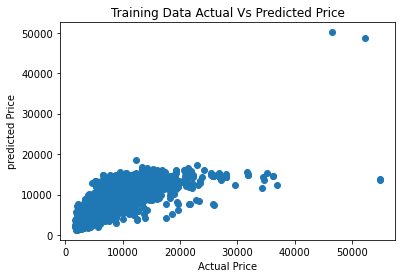

In [683]:
plt.scatter(y_train,ypred_train)
plt.xlabel("Actual Price")
plt.ylabel("predicted Price")
plt.title("Training Data Actual Vs Predicted Price")
plt.show()

In [684]:
mse = mean_squared_error(y_test,ypred_test)
rmse = math.sqrt(mse)
print("Test Root Mean Square Error:",rmse)

Test Root Mean Square Error: 2907.780168050053


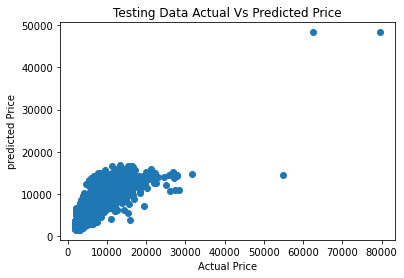

In [685]:
plt.scatter(y_test,ypred_test)
plt.xlabel("Actual Price")
plt.ylabel("predicted Price")
plt.title("Testing Data Actual Vs Predicted Price")
plt.show()

In [686]:
ypred_test[:5]

array([ 6551.30392615, 10420.08613636,  7422.59803798, 11703.44902591,
        5956.16851178])

In [687]:
y_test.head()

5539     9413
1792    14151
8790     6144
213      7677
6428    11982
Name: Price, dtype: int64

In [688]:
mod=sm.OLS(y,x)      #OLS Model
ols_mod=mod.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     501.0
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:14:02   Log-Likelihood:                -84449.
No. Observations:                9000   AIC:                         1.690e+05
Df Residuals:                    8971   BIC:                         1.692e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Stops                              4686.9234    276.400     16.957      0.000    4145.116    5228.730
Route_1                            -182.3045     64.660     -2.819      0.005    -309.053     -55.556
Route_2                             -66.3042      4.360    -15.206      0.000     -74.851     -57.757
Route_3                               1.6980     12.356      0.137      0.891     -22.523      25.919
Route_4                             282.5264     40.769      6.930      0.000     202.610     362.443
Route_5                             968.2261    199.311      4.858      0.000     577.531    1358.922
Air India                          1949.9713    209.036      9.328      0.000    1540.213    2359.730
GoAir                              -384.5930    293.098     -1.312      0.189    -959.131     189.945
IndiGo                              589.9755    198.119      2.978      0.003     201.616     978.335
Jet Airways                        4154.0695    197.270     21.058      0.000    3767.375    4540.764
Jet Airways Business               4.922e+04   1456.817     33.786      0.000    4.64e+04    5.21e+04
Multiple carriers                  3267.0570    217.191     15.042      0.000    2841.313    3692.801
Multiple carriers Premium economy  4207.1411    891.784      4.718      0.000    2459.041    5955.241
SpiceJet                            288.0506    216.528      1.330      0.183    -136.395     712.496
Trujet                            -2419.8699   2893.931     -0.836      0.403   -8092.635    3252.896
Vistara                            2248.8370    239.397      9.394      0.000    1779.564    2718.110
Vistara Premium economy            3880.3881   1676.338      2.315      0.021     594.383    7166.393
Banglore                           -265.1205     39.992     -6.629      0.000    -343.513    -186.728
Cochin                                8.6131    209.117      0.041      0.967    -401.305     418.531
Delhi                               288.2805     37.139      7.762      0.000     215.479     361.082
Hyderabad                          -766.9051    465.131     -1.649      0.099   -1678.667     144.857
Kolkata                             272.2506     59.822      4.551      0.000     154.986     389.515
Banglore                            288.2805     37.139      7.762      0.000     215.479     361.082
Chennai                             272.2506     59.822      4.551      0.000     154.986     389.515
Delhi                                 8.6131    209.117      0.041      0.967    -401.305     418.531
Kolkata                            -265.1205     39.992     -6.629      0.000    -343.513    -186.728
Mumbai                             -766.9051    465.131     -1.649      0.099   -1678.667     144.857
Distance(Km)           

C:\Users\kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


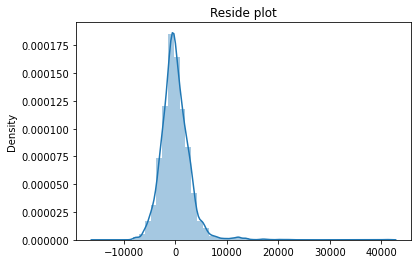

In [689]:
sns.distplot(ols_mod.resid)
plt.title("Reside plot")
plt.show()

In [690]:
ols_mod.resid.skew()   #checking skewness

2.1831762281946925

In [691]:
lr_backward=sfs(estimator=lin_reg_model,k_features='best',scoring='r2',forward=False)
sfs_back=lr_backward.fit(x,y)

feat_back=list(sfs_back.k_feature_names_)

print(feat_back)
print(sfs_back.k_score_)

['Stops', 'Route_1', 'Route_2', 'Route_4', 'Route_5', 'Air India', 'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara', 'Vistara Premium economy', 'Banglore', 'Cochin', 'Delhi', 'Kolkata', 'Banglore', 'Chennai', 'Kolkata', 'Mumbai', 'day_of_journey', 'month_of_journey', 'Departure_hour', 'Arrival_hour', 'Arrival_minute', 'Journey_hours', 'Journey_mins']
0.604516748404628


In [692]:
lr_forward=sfs(estimator=lin_reg_model,k_features='best',scoring='r2',forward=True)
sfs_forw=lr_forward.fit(x,y)

feat_forw=list(sfs_forw.k_feature_names_)

print(feat_forw)
print(sfs_forw.k_score_)

['Stops', 'Route_2', 'Route_4', 'Route_5', 'Air India', 'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara', 'Vistara Premium economy', 'Delhi', 'Kolkata', 'Banglore', 'day_of_journey', 'month_of_journey', 'Departure_hour', 'Arrival_hour', 'Arrival_minute', 'Journey_hours', 'Journey_mins']
0.604566014048973


In [693]:
rfe=RFE(estimator=lin_reg_model,n_features_to_select=5)
rfe_mod=rfe.fit(x,y)

In [694]:
rfe_mod.ranking_

array([ 9, 23, 24, 31, 18, 16, 15, 19, 17, 11,  7, 13, 12, 20,  8, 14, 10,
        1,  2,  1,  3,  5,  4,  1,  1,  6,  1, 32, 22, 21, 26, 30, 25, 28,
       27, 29])

In [695]:
x.columns

Index(['Stops', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Banglore', 'Cochin',
       'Delhi', 'Hyderabad', 'Kolkata', 'Banglore', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Distance(Km)', 'day_of_journey',
       'month_of_journey', 'Departure_hour', 'Departure_minute',
       'Arrival_hour', 'Arrival_minute', 'Journey_hours', 'Journey_mins'],
      dtype='object')

In [696]:
rank=pd.DataFrame()
rank['Feature']=x.columns
rank['Rank']=rfe_mod.ranking_
rank

,Feature,Rank
0,Stops,9
1,Route_1,23
2,Route_2,24
3,Route_3,31
4,Route_4,18
5,Route_5,16
6,Air India,15
7,GoAir,19
8,IndiGo,17
9,Jet Airways,11


In [697]:
feat_rfe=list(rank[rank['Rank']==1]['Feature'])
print(feat_rfe)

['Banglore', 'Delhi', 'Chennai', 'Delhi', 'Mumbai']


In [698]:
rfe=RFECV(estimator=lin_reg_model)
rfe_mod=rfe.fit(x,y)

In [699]:
rank=pd.DataFrame()
rank['Feature']=x.columns
rank['Rank']=rfe_mod.ranking_
feat_rfe=list(rank[rank['Rank']==1]['Feature'])
print(feat_rfe)

['Stops', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara', 'Vistara Premium economy', 'Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'Banglore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Distance(Km)', 'day_of_journey', 'month_of_journey', 'Departure_hour', 'Departure_minute', 'Arrival_hour', 'Arrival_minute', 'Journey_hours', 'Journey_mins']


In [700]:
print(feat_back)
print("\n")
print(feat_forw)
print("\n")
print(feat_rfe)

['Stops', 'Route_1', 'Route_2', 'Route_4', 'Route_5', 'Air India', 'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara', 'Vistara Premium economy', 'Banglore', 'Cochin', 'Delhi', 'Kolkata', 'Banglore', 'Chennai', 'Kolkata', 'Mumbai', 'day_of_journey', 'month_of_journey', 'Departure_hour', 'Arrival_hour', 'Arrival_minute', 'Journey_hours', 'Journey_mins']


['Stops', 'Route_2', 'Route_4', 'Route_5', 'Air India', 'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara', 'Vistara Premium economy', 'Delhi', 'Kolkata', 'Banglore', 'day_of_journey', 'month_of_journey', 'Departure_hour', 'Arrival_hour', 'Arrival_minute', 'Journey_hours', 'Journey_mins']


['Stops', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers', 'Multiple carriers

In [701]:
lin_reg_model.fit(x_train[feat_back],y_train)
y_pred=lin_reg_model.predict(x_test[feat_back])
r2=r2_score(y_test,y_pred)
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print('R2 score of feat_back:',r2)
print('RMSE score of feat_back:',rmse)

R2 score of feat_back: 0.6192314875755403
RMSE score of feat_back: 2907.9120905845684


In [702]:
lin_reg_model.fit(x_train[feat_forw],y_train)
y_pred=lin_reg_model.predict(x_test[feat_forw])
r2=r2_score(y_test,y_pred)
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print('R2 score of feat_forw:',r2)
print('RMSE score of feat_forw:',rmse)

R2 score of feat_forw: 0.619231487575539
RMSE score of feat_forw: 2907.912090584573


In [703]:
lin_reg_model.fit(x_train[feat_rfe],y_train)
y_pred=lin_reg_model.predict(x_test[feat_rfe])
r2=r2_score(y_test,y_pred)
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print('R2 score of feat_rfe:',r2)
print('RMSE score of feat_rfe:',rmse)

R2 score of feat_rfe: 0.6192660352553159
RMSE score of feat_rfe: 2907.780168049874


In [704]:
score = cross_val_score(lin_reg_model,x,y,cv=3,scoring='r2')
avg_score = score.mean()
coef_var = score.std()/score.mean()

print("The Average Score:",avg_score)
print("The Variance Error:",coef_var)

The Average Score: 0.6044421549973885
The Variance Error: 0.022975901574539742


# Regularization Technique

Ridge

In [705]:
rid=Ridge(alpha=1,normalize=True)

In [706]:
score=cross_val_score(rid,x,y,cv=3,scoring='r2')
print(score)
r2_avg_rid=np.mean(score)
r2_dev_rid=np.std(score)/np.mean(score)*100
print(r2_avg_rid)
print(r2_dev_rid)

[0.50444903 0.53735933 0.53395472]
0.5252543585000482
2.8133237292236326


C:\Users\kumar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\kumar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

Lasso

In [707]:
las=Lasso(alpha=0.01,normalize=True)

In [708]:
score=cross_val_score(las,x,y,cv=3,scoring='r2')
print(score)
r2_avg_las=np.mean(score)
r2_dev_las=np.std(score)/np.mean(score)*100
print(r2_avg_las)
print(r2_dev_las)

C:\Users\kumar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\kumar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

f

[0.60639148 0.62031769 0.58665977]
0.6044563134135231
2.284491501404695


Elastic Net

In [709]:
enet=ElasticNet(alpha=0.0002,l1_ratio=0.01,normalize=True)

In [710]:
score=cross_val_score(enet,x,y,cv=3,scoring='r2')
print(score)
r2_avg_enet=np.mean(score)
r2_dev_enet=np.std(score)/np.mean(score)*100
print(r2_avg_enet)
print(r2_dev_enet)

[0.48952768 0.52395969 0.52247239]
0.511986584863818
3.1040755772896085


C:\Users\kumar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
C:\Users\kumar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in

In [711]:
rid_final=Ridge(alpha=0.1,normalize=True)
rid_final.fit(x_train,y_train)
print(rid_final.coef_)
print(x_train.columns)

[ 1.90632634e+03 -7.91980269e+01 -5.99311280e+01 -9.10282731e+01
 -8.34220328e+01 -7.76669566e+01  2.27646956e+02 -1.73816770e+03
 -9.97613289e+02  2.33835577e+03  3.33719028e+04  1.51502147e+03
  2.02791919e+03 -1.26152495e+03 -2.79196070e+03  3.47703405e+02
  3.17051541e+03 -2.41886574e+02 -4.90943074e+01  4.08857321e+02
 -2.67452085e+02  2.16213648e+02  4.08857321e+02  2.16213648e+02
 -4.90943074e+01 -2.41886574e+02 -2.67452085e+02  1.37675788e-01
 -7.80814007e+01 -9.35448454e+01  7.24378599e+00  7.74636298e-01
 -1.30044178e+01  4.94480141e+00  1.91158220e+01 -5.61265123e+00]
Index(['Stops', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Banglore', 'Cochin',
       'Delhi', 'Hyderabad', 'Kolkata', 'Banglore', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Distance(K

C:\Users\kumar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [712]:
las_final=Lasso(alpha=0.01,normalize=True)
las_final.fit(x_train,y_train)
print(las_final.coef_)
print(x_train.columns)

[ 4.65190777e+03 -0.00000000e+00 -6.87253932e+01  0.00000000e+00
  2.65724205e+02  1.07913540e+03  1.94120690e+03 -3.64636158e+02
  5.82440993e+02  4.19550056e+03  3.76941855e+04  3.26890183e+03
  3.84740834e+03  3.02568836e+02 -2.20556181e+03  2.15584074e+03
  5.09172629e+03 -2.26969670e+01  0.00000000e+00  1.29806286e+03
 -2.72110486e+02  8.21521472e+02  5.24581239e+01  1.50247622e+01
  0.00000000e+00 -0.00000000e+00 -1.86454538e+01  0.00000000e+00
 -8.35327104e+01 -1.09695406e+02  1.03979941e+01  2.55800812e+00
 -1.75898478e+01  7.32458346e+00 -1.39983986e+01 -3.16622970e+00]
Index(['Stops', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Banglore', 'Cochin',
       'Delhi', 'Hyderabad', 'Kolkata', 'Banglore', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Distance(K

C:\Users\kumar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [713]:
enet_final=ElasticNet(alpha=0.0002,l1_ratio=0.01,normalize=True)
enet_final.fit(x_train,y_train)
print(enet_final.coef_)
print(x_train.columns)

[ 8.71799962e+02  1.60143047e+00 -2.46658542e+01 -5.36159728e+01
 -9.30622615e+01 -1.36447243e+02 -6.24406851e+01 -1.04367958e+03
 -9.93521931e+02  1.20079590e+03  1.70736889e+04  5.20899803e+02
  6.98234406e+02 -1.16437442e+03 -1.33558440e+03 -1.52976498e+02
  1.51118179e+03 -6.76257639e+01  1.46334593e+02  1.06917704e+02
 -4.63614829e+02 -3.60586481e+02  1.06917703e+02 -3.60586479e+02
  1.46334588e+02 -6.76257612e+01 -4.63614826e+02  3.60589593e-01
 -3.88269560e+01 -2.36316313e+01  5.52489277e+00  2.16389717e-01
 -3.71093945e+00 -2.42293374e-01  4.60043112e+01 -6.21165742e+00]
Index(['Stops', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Banglore', 'Cochin',
       'Delhi', 'Hyderabad', 'Kolkata', 'Banglore', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Distance(K

C:\Users\kumar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(


In [714]:
hyp_param={'alpha':[0.0001,0.001,0.01,0.1,1,2,5,10]}
rid=Ridge(normalize=True)
hyp_mod=GridSearchCV(rid,param_grid=hyp_param,cv=5,scoring='r2')
tun_model=hyp_mod.fit(x_train,y_train)
print('Best Hyper parameter:',tun_model.best_params_)
print('Best_Score:',tun_model.best_score_)

C:\Users\kumar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\kumar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

Best Hyper parameter: {'alpha': 0.001}
Best_Score: 0.5962317580578507


C:\Users\kumar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\kumar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

In [715]:
Result_tuning=pd.DataFrame(tun_model.cv_results_)
Result_tuning

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006141,0.001008,0.002029,0.000069,0.0001,{'alpha': 0.0001},0.567089,0.655982,0.587207,0.567019,0.603857,0.596231,0.032901,2
1,0.007635,0.000488,0.002344,0.000668,0.001,{'alpha': 0.001},0.567543,0.655648,0.587297,0.566903,0.603768,0.596232,0.032711,1
2,0.005113,0.000223,0.001443,0.000461,0.01,{'alpha': 0.01},0.569028,0.652734,0.586751,0.565032,0.602240,0.595157,0.031705,3
3,0.004344,0.006482,0.000225,0.000450,0.1,{'alpha': 0.1},0.561182,0.640873,0.579927,0.554959,0.593832,0.586155,0.030622,4
4,0.008742,0.005950,0.000457,0.000915,1,{'alpha': 1},0.491635,0.564717,0.516184,0.496477,0.535968,0.520996,0.026915,5
5,0.006888,0.000632,0.002015,0.000030,2,{'alpha': 2},0.434600,0.496997,0.453041,0.441598,0.478762,0.461000,0.023444,6
6,0.006957,0.000918,0.001800,0.000386,5,{'alpha': 5},0.326715,0.370111,0.334173,0.332809,0.363029,0.345368,0.017636,7
7,0.006745,0.000704,0.001609,0.000497,10,{'alpha': 10},0.232841,0.262043,0.234667,0.236582,0.259393,0.245105,0.012830,8


In [716]:
Result_tuning['coef_var']=Result_tuning['std_test_score']/Result_tuning['mean_test_score']
Result_tuning

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,coef_var
0,0.006141,0.001008,0.002029,0.000069,0.0001,{'alpha': 0.0001},0.567089,0.655982,0.587207,0.567019,0.603857,0.596231,0.032901,2,0.055181
1,0.007635,0.000488,0.002344,0.000668,0.001,{'alpha': 0.001},0.567543,0.655648,0.587297,0.566903,0.603768,0.596232,0.032711,1,0.054864
2,0.005113,0.000223,0.001443,0.000461,0.01,{'alpha': 0.01},0.569028,0.652734,0.586751,0.565032,0.602240,0.595157,0.031705,3,0.053272
3,0.004344,0.006482,0.000225,0.000450,0.1,{'alpha': 0.1},0.561182,0.640873,0.579927,0.554959,0.593832,0.586155,0.030622,4,0.052243
4,0.008742,0.005950,0.000457,0.000915,1,{'alpha': 1},0.491635,0.564717,0.516184,0.496477,0.535968,0.520996,0.026915,5,0.051661
5,0.006888,0.000632,0.002015,0.000030,2,{'alpha': 2},0.434600,0.496997,0.453041,0.441598,0.478762,0.461000,0.023444,6,0.050854
6,0.006957,0.000918,0.001800,0.000386,5,{'alpha': 5},0.326715,0.370111,0.334173,0.332809,0.363029,0.345368,0.017636,7,0.051064
7,0.006745,0.000704,0.001609,0.000497,10,{'alpha': 10},0.232841,0.262043,0.234667,0.236582,0.259393,0.245105,0.012830,8,0.052345


In [717]:
sc=StandardScaler()
inp_sc=sc.fit_transform(x)
out_sc=(y-y.mean())/y.std()

In [718]:
sgd=SGDRegressor()
sgd.fit(x_train,y_train)
ypred=sgd.predict(x_test)

In [719]:
r2_score(y_test,ypred)

-1.7536045000670675e+22

In [720]:
pf=PolynomialFeatures(degree=2,include_bias=False, interaction_only=True)

In [721]:
inp_pf=pf.fit_transform(x[feat_back])
inp_pf=pd.DataFrame(inp_pf,index=x.index)
inp_pf.columns=pf.get_feature_names()
inp_pf.head()

C:\Users\kumar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x0 x1,x0 x2,x0 x3,x0 x4,x0 x5,x0 x6,x0 x7,x0 x8,x0 x9,x0 x10,x0 x11,x0 x12,x0 x13,x0 x14,x0 x15,x0 x16,x0 x17,x0 x18,x0 x19,x0 x20,x0 x21,x0 x22,x0 x23,x0 x24,x0 x25,x0 x26,x0 x27,x0 x28,x0 x29,x0 x30,x0 x31,x0 x32,x0 x33,x0 x34,x1 x2,x1 x3,x1 x4,x1 x5,x1 x6,x1 x7,x1 x8,x1 x9,x1 x10,x1 x11,x1 x12,x1 x13,x1 x14,x1 x15,x1 x16,x1 x17,x1 x18,x1 x19,x1 x20,x1 x21,x1 x22,x1 x23,x1 x24,x1 x25,x1 x26,x1 x27,x1 x28,x1 x29,x1 x30,x1 x31,x1 x32,x1 x33,x1 x34,x2 x3,x2 x4,x2 x5,x2 x6,x2 x7,x2 x8,x2 x9,x2 x10,x2 x11,x2 x12,x2 x13,x2 x14,x2 x15,x2 x16,x2 x17,x2 x18,x2 x19,x2 x20,x2 x21,x2 x22,x2 x23,x2 x24,x2 x25,x2 x26,x2 x27,x2 x28,x2 x29,x2 x30,x2 x31,x2 x32,x2 x33,x2 x34,x3 x4,x3 x5,x3 x6,x3 x7,x3 x8,x3 x9,x3 x10,x3 x11,x3 x12,x3 x13,x3 x14,x3 x15,x3 x16,x3 x17,x3 x18,x3 x19,x3 x20,x3 x21,x3 x22,x3 x23,x3 x24,x3 x25,x3 x26,x3 x27,x3 x28,x3 x29,x3 x30,x3 x31,x3 x32,x3 x33,x3 x34,x4 x5,x4 x6,x4 x7,x4 x8,x4 x9,x4 x10,x4 x11,x4 x12,x4 x13,x4 x14,x4 x15,x4 x16,x4 x17,x4 x18,x4 x19,x4 x20,x4 x21,x4 x22,x4 x23,x4 x24,x4 x25,x4 x26,x4 x27,x4 x28,x4 x29,x4 x30,x4 x31,x4 x32,x4 x33,x4 x34,x5 x6,x5 x7,x5 x8,x5 x9,x5 x10,x5 x11,x5 x12,x5 x13,x5 x14,x5 x15,x5 x16,x5 x17,x5 x18,x5 x19,x5 x20,x5 x21,x5 x22,x5 x23,x5 x24,x5 x25,x5 x26,x5 x27,x5 x28,x5 x29,x5 x30,x5 x31,x5 x32,x5 x33,x5 x34,x6 x7,x6 x8,x6 x9,x6 x10,x6 x11,x6 x12,x6 x13,x6 x14,x6 x15,x6 x16,x6 x17,x6 x18,x6 x19,x6 x20,x6 x21,x6 x22,x6 x23,x6 x24,x6 x25,x6 x26,x6 x27,x6 x28,x6 x29,x6 x30,x6 x31,x6 x32,x6 x33,x6 x34,x7 x8,x7 x9,x7 x10,x7 x11,x7 x12,x7 x13,x7 x14,x7 x15,x7 x16,x7 x17,x7 x18,x7 x19,x7 x20,x7 x21,x7 x22,x7 x23,x7 x24,x7 x25,x7 x26,x7 x27,x7 x28,x7 x29,x7 x30,x7 x31,x7 x32,x7 x33,x7 x34,x8 x9,x8 x10,x8 x11,x8 x12,x8 x13,x8 x14,x8 x15,x8 x16,x8 x17,x8 x18,x8 x19,x8 x20,x8 x21,x8 x22,x8 x23,x8 x24,x8 x25,x8 x26,x8 x27,x8 x28,x8 x29,x8 x30,x8 x31,x8 x32,x8 x33,x8 x34,x9 x10,x9 x11,x9 x12,x9 x13,x9 x14,x9 x15,x9 x16,x9 x17,x9 x18,x9 x19,x9 x20,x9 x21,x9 x22,x9 x23,x9 x24,x9 x25,x9 x26,x9 x27,x9 x28,x9 x29,x9 x30,x9 x31,x9 x32,x9 x33,x9 x34,x10 x11,x10 x12,x10 x13,x10 x14,x10 x15,x10 x16,x10 x17,x10 x18,x10 x19,x10 x20,x10 x21,x10 x22,x10 x23,x10 x24,x10 x25,x10 x26,x10 x27,x10 x28,x10 x29,x10 x30,x10 x31,x10 x32,x10 x33,x10 x34,x11 x12,x11 x13,x11 x14,x11 x15,x11 x16,x11 x17,x11 x18,x11 x19,x11 x20,x11 x21,x11 x22,x11 x23,x11 x24,x11 x25,x11 x26,x11 x27,x11 x28,x11 x29,x11 x30,x11 x31,x11 x32,x11 x33,x11 x34,x12 x13,x12 x14,x12 x15,x12 x16,x12 x17,x12 x18,x12 x19,x12 x20,x12 x21,x12 x22,x12 x23,x12 x24,x12 x25,x12 x26,x12 x27,x12 x28,x12 x29,x12 x30,x12 x31,x12 x32,x12 x33,x12 x34,x13 x14,x13 x15,x13 x16,x13 x17,x13 x18,x13 x19,x13 x20,x13 x21,x13 x22,x13 x23,x13 x24,x13 x25,x13 x26,x13 x27,x13 x28,x13 x29,x13 x30,x13 x31,x13 x32,x13 x33,x13 x34,x14 x15,x14 x16,x14 x17,x14 x18,x14 x19,x14 x20,x14 x21,x14 x22,x14 x23,x14 x24,x14 x25,x14 x26,x14 x27,x14 x28,x14 x29,x14 x30,x14 x31,x14 x32,x14 x33,x14 x34,x15 x16,x15 x17,x15 x18,x15 x19,x15 x20,x15 x21,x15 x22,x15 x23,x15 x24,x15 x25,x15 x26,x15 x27,x15 x28,x15 x29,x15 x30,x15 x31,x15 x32,x15 x33,x15 x34,x16 x17,x16 x18,x16 x19,x16 x20,x16 x21,x16 x22,x16 x23,x16 x24,x16 x25,x16 x26,x16 x27,x16 x28,x16 x29,x16 x30,x16 x31,x16 x32,x16 x33,x16 x34,x17 x18,x17 x19,x17 x20,x17 x21,x17 x22,x17 x23,x17 x24,x17 x25,x17 x26,x17 x27,x17 x28,x17 x29,x17 x30,x17 x31,x17 x32,x17 x33,x17 x34,x18 x19,x18 x20,x18 x21,x18 x22,x18 x23,x18 x24,x18 x25,x18 x26,x18 x27,x18 x28,x18 x29,x18 x30,x18 x31,x18 x32,x18 x33,x18 x34,x19 x20,x19 x21,x19 x22,x19 x23,x19 x24,x19 x25,x19 x26,x19 x27,x19 x28,x19 x29,x19 x30,x19 x31,x19 x32,x19 x33,x19 x34,x20 x21,x20 x22,x20 x23,x20 x24,x20 x25,x20 x26,x20 x27,x20 x28,x20 x29,x20 x30,x20 x31,x20 x32,x20 x33,x20 x34,x21 x22,x21 x23,x21 x24,x21 x25,x21 x26,x21 x27,x21 x28,x21 x29,x21 x30,x21 x31,x21 x32,x21 x33,x21 x34,x22 x23,x22 x24,x22 x25,x22 x26,x22 x27,x22 x28,x22 x29,x22 x30,x22 x31,x

In [722]:
inpc=sm.add_constant(inp_pf)
mod=sm.OLS(y,x)
ols_mod=mod.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     501.0
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:14:51   Log-Likelihood:                -84449.
No. Observations:                9000   AIC:                         1.690e+05
Df Residuals:                    8971   BIC:                         1.692e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Stops                              4686.9234    276.400     16.957      0.000    4145.116    5228.730
Route_1                            -182.3045     64.660     -2.819      0.005    -309.053     -55.556
Route_2                             -66.3042      4.360    -15.206      0.000     -74.851     -57.757
Route_3                               1.6980     12.356      0.137      0.891     -22.523      25.919
Route_4                             282.5264     40.769      6.930      0.000     202.610     362.443
Route_5                             968.2261    199.311      4.858      0.000     577.531    1358.922
Air India                          1949.9713    209.036      9.328      0.000    1540.213    2359.730
GoAir                              -384.5930    293.098     -1.312      0.189    -959.131     189.945
IndiGo                              589.9755    198.119      2.978      0.003     201.616     978.335
Jet Airways                        4154.0695    197.270     21.058      0.000    3767.375    4540.764
Jet Airways Business               4.922e+04   1456.817     33.786      0.000    4.64e+04    5.21e+04
Multiple carriers                  3267.0570    217.191     15.042      0.000    2841.313    3692.801
Multiple carriers Premium economy  4207.1411    891.784      4.718      0.000    2459.041    5955.241
SpiceJet                            288.0506    216.528      1.330      0.183    -136.395     712.496
Trujet                            -2419.8699   2893.931     -0.836      0.403   -8092.635    3252.896
Vistara                            2248.8370    239.397      9.394      0.000    1779.564    2718.110
Vistara Premium economy            3880.3881   1676.338      2.315      0.021     594.383    7166.393
Banglore                           -265.1205     39.992     -6.629      0.000    -343.513    -186.728
Cochin                                8.6131    209.117      0.041      0.967    -401.305     418.531
Delhi                               288.2805     37.139      7.762      0.000     215.479     361.082
Hyderabad                          -766.9051    465.131     -1.649      0.099   -1678.667     144.857
Kolkata                             272.2506     59.822      4.551      0.000     154.986     389.515
Banglore                            288.2805     37.139      7.762      0.000     215.479     361.082
Chennai                             272.2506     59.822      4.551      0.000     154.986     389.515
Delhi                                 8.6131    209.117      0.041      0.967    -401.305     418.531
Kolkata                            -265.1205     39.992     -6.629      0.000    -343.513    -186.728
Mumbai                             -766.9051    465.131     -1.649      0.099   -1678.667     144.857
Distance(Km)           

# Save the Model for Full Pipeline

In [728]:
joblib.dump(lin_reg_model,'Linear_model_joblib')

['Linear_model_joblib']

In [729]:
Lin_job = joblib.load('Linear_model_joblib')

In [730]:
Lin_job

LinearRegression()